In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from os import path
import os
import wordcloud

In [2]:
# df = pd.DataFrame({'a':[1],'b':[2]})
# df2 = pd.DataFrame({'a':[4,],'b':[6]})
# df.append(df2,ignore_index = True)
# # print(df)

In [3]:
# d1 = {'a':[1],'b':[2]}
# df = pd.DataFrame(columns = d1.keys())

In [4]:
#读取CSV数据文件
df = pd.read_csv(r'E:\python4\lagou1124pro\qcwy.csv')

In [5]:
df.head(10)

,job_name,company_name,salary,create_time,area,work_experience,education,people_num,job_information,company_area,company_info,work_fare,company_type,company_size,work_area,job_url
0,Python开发工程师,融信在线（北京）教育科技有限公司,0.8-2万/月,12-06,北京-丰台区,2年经验,本科,招3人,岗位职责：1. 熟悉C语言2. 至少2年以上Python编程经验3. 熟练运用Python语...,上班地址：丰台区万年花城附近\t\t\t\t\t\t\t\r\n地图,融信在线（北京）教育科技公司，致力于IT人才的培养、推荐、职业规划。中国国内真正专业培养数据...,五险一金\r\n年终奖金\r\n绩效奖金\r\n股票期权,民营公司,少于50人,"计算机服务(系统、数据服务、维修),教育/培训/院校",https://jobs.51job.com/beijing-ftq/75101700.ht...
1,Python开发工程师,北京斯普信信息技术有限公司,1-1.5万/月,12-06,北京,2年经验,大专,招1人,1、完成网络拓扑架构研发2、完成页面布局、浏览器适配、分辨率适配等功能3、完成相应模块的前端...,上班地址：海淀区羊坊店路9号 京门大厦\t\t\t\t\t\t\t\r\n地图,北京斯普信信息技术有限公司是一家专业性IT咨询服务公司，核心业务是数据库、小型机支持服务和人...,NaN,民营公司,150-500人,"计算机软件,互联网/电子商务",https://jobs.51job.com/beijing/97824451.html?s...
2,Python工程师,北京联龙博通电子商务技术有限公司,1-1.5万/月,12-06,北京-丰台区,3-4年经验,本科,招1人,岗位职责：1、负责后台微服务模块设计和开发，并具有后台独立开发能力和前后端联调经验；2、制定...,上班地址：马家堡\t\t\t\t\t\t\t\r\n地图,"北京联龙博通电子商务技术有限公司 （China M-world Co.,Ltd.，以下简称联...",五险一金\r\n绩效奖金\r\n年终奖金\r\n餐饮补贴\r\n通讯补贴,民营公司,1000-5000人,"互联网/电子商务,银行",https://jobs.51job.com/beijing-ftq/102501293.h...
3,Python开发工程师,纬创软件（北京）有限公司,1.2-2万/月,11-16,北京-朝阳区,3-4年经验,本科,招2人,主要工作职责： --参与运维支撑平台的建设、自动化运维平台以及运维工具的开发工作； ...,上班地址：来广营 诚盈中心 1号楼\t\t\t\t\t\t\t\r\n地图,公司概述纬创软件是亚洲地区专业的软件外包服务及信息整合服务的的领导厂商。我们专注于技术顾问服...,五险一金\r\n员工旅游\r\n弹性工作\r\n年终奖金,外资（非欧美）,1000-5000人,"计算机软件,计算机服务(系统、数据服务、维修)",https://jobs.51job.com/beijing-cyq/107746321.h...
4,Python/Golang/Linux C/中高级研发工程师,北京傲盾软件有限责任公司,0.6-1.2万/月,11-16,北京-海淀区,无工作经验,本科,招3人,岗位职责：1. 安全云平台研发。2. 互联网安全产品研发。3. 经过公司岗位培训后，能快速学...,上班地址：上地四街1号院3号楼5层\t\t\t\t\t\t\t\r\n地图,"傲盾防火墙开发团队成立于1998年。其成员既有海外留学生,也有根植于中国本土、熟悉国内技术发...",五险一金\r\n餐饮补贴\r\n专业培训\r\n绩效奖金\r\n年终奖金\r\n股票期权\r...,民营公司,50-150人,计算机软件,https://jobs.51job.com/beijing-hdq/96393288.ht...
5,python高级开发工程师,北京博学慎思教育科技有限公司,2-4万/月,12-06,北京-海淀区,5-7年经验,本科,招1人,工作职责：1.参与项目需求讨论，技术方案设计评审，并对系统性能，稳定性以及扩展性做出正确的预...,上班地址：盈创动力园A座北厅6楼601B\t\t\t\t\t\t\t\r\n地图,北京博学慎思教育科技有限公司是一家用创新技术打造智能学习体验的互联网科技公司。公司已得到创新...,五险一金\r\n餐饮补贴\r\n交通补贴\r\n弹性工作\r\n年终奖金\r\n带薪年假,创业公司,50-150人,"互联网/电子商务,教育/培训/院校",https://jobs.51job.com/beijing-hdq/101052768.h...
6,Python开发工程师,彩讯科技股份有限公司,0.8-1.5万/月,12-06,北京-东城区,3-4年经验,大专,招若干人,岗位职责：1.完成现有项目产品平台的改进与开发职位要求：1.大专及以上学历，计算机相关专业毕...,上班地址：瀚海科技大厦\t\t\t\t\t\t\t\r\n地图,公司简介： 彩讯科技股份有限公司是国家规划布局重点软件企业之一，致力于成长为中国领先的...,五险一金\r\n通讯补贴\r\n定期体检\r\n绩效奖金\r\n员工旅游,上市公司,1000-5000人,"通信/电信运营、增值服务,互联网/电子商务",https://jobs.51job.com/beijing-dcq/107760653.h...
7,Python开发工程师,北京第三石信息技术有限公司,1.5-3万/月,11-01,北京-朝阳区,3-4年经验,本科,招2人,岗位职责： 1、参与用户、支付、消息、聊天、Gateway系统的开发与维护 2、参与高并发在...,上班地址：望京SOHO塔1B座506\t\t\t\t\t\t\t\r\n地图,【5Miles】 5Miles是一家美国市场领先的电商服务平台，基于位置信息，用户可以快速可...,五险一金\r\n交通补贴\r\n餐饮补贴\r\n绩效奖金\r\n年终奖金\r\n不加班,民营公司,50-150人,"计算机软件,互联网/电子商务",https://jobs.51job.com/beijing-cyq/105622857.h...
8,Python开发工程师(面向2018届毕业生),江森自控（中国）投资有限公司,0.8-1万/月,12-06,北京,无工作经验,本科,招1人,职位描述1. 参与工厂能效大数据管理软件的需求分析、架构设计、代码开发、功能测试和现场部署等...,上班地址：北京市东城区祈年大街兴隆国际大厦18号院2号楼\t\t\t\t\t\t\t\r\n地图,关于江森自控江森自控是全球多元化技术和工业领域的领导者，致力于为150多个国家的广大客户提供...,NaN,外资（欧美）,5000-10000人,"机械/设备/重工,汽车及零配件",https://jobs.51job.com/beijing/98471332.html?s...
9,Python开发工程师,易思奇汽车电子（上海）有限公司,NaN,12-05,北京,无工作经验,招3人,12-05发布,Scope of work: Responsible for develop BMW En...,上班地址：北京顺义区天竺东路\t\t\t\t\t\t\t\r\n地图,ESG Automotive China is a sound and steadily g...,五险一金\r\n补充医疗保险\r\n年终奖金\r\n定期体检\r\n专业培训\r\n带薪年假...,外资（欧美）,1000-5000人,"汽车及零配件,计算机服务(系统、数据服务、维修)",https://jobs.51job.com/beijing/104926588.html?...


In [6]:
len(df)

5989

In [7]:
# help(df['job_url'].str)

In [8]:
#删除链接不匹配的数据行，即空数据
ss = df['job_url'].str.startswith('https://jobs.51job.com')

In [9]:
# df[df['job_url'].str.startswith('https://jobs.51job.com')].head()

,job_name,company_name,salary,create_time,area,work_experience,education,people_num,job_information,company_area,company_info,work_fare,company_type,company_size,work_area,job_url
0,Python开发工程师,融信在线（北京）教育科技有限公司,0.8-2万/月,12-06,北京-丰台区,2年经验,本科,招3人,岗位职责：1. 熟悉C语言2. 至少2年以上Python编程经验3. 熟练运用Python语...,上班地址：丰台区万年花城附近\t\t\t\t\t\t\t\r\n地图,融信在线（北京）教育科技公司，致力于IT人才的培养、推荐、职业规划。中国国内真正专业培养数据...,五险一金\r\n年终奖金\r\n绩效奖金\r\n股票期权,民营公司,少于50人,"计算机服务(系统、数据服务、维修),教育/培训/院校",https://jobs.51job.com/beijing-ftq/75101700.ht...
1,Python开发工程师,北京斯普信信息技术有限公司,1-1.5万/月,12-06,北京,2年经验,大专,招1人,1、完成网络拓扑架构研发2、完成页面布局、浏览器适配、分辨率适配等功能3、完成相应模块的前端...,上班地址：海淀区羊坊店路9号 京门大厦\t\t\t\t\t\t\t\r\n地图,北京斯普信信息技术有限公司是一家专业性IT咨询服务公司，核心业务是数据库、小型机支持服务和人...,NaN,民营公司,150-500人,"计算机软件,互联网/电子商务",https://jobs.51job.com/beijing/97824451.html?s...
2,Python工程师,北京联龙博通电子商务技术有限公司,1-1.5万/月,12-06,北京-丰台区,3-4年经验,本科,招1人,岗位职责：1、负责后台微服务模块设计和开发，并具有后台独立开发能力和前后端联调经验；2、制定...,上班地址：马家堡\t\t\t\t\t\t\t\r\n地图,"北京联龙博通电子商务技术有限公司 （China M-world Co.,Ltd.，以下简称联...",五险一金\r\n绩效奖金\r\n年终奖金\r\n餐饮补贴\r\n通讯补贴,民营公司,1000-5000人,"互联网/电子商务,银行",https://jobs.51job.com/beijing-ftq/102501293.h...
3,Python开发工程师,纬创软件（北京）有限公司,1.2-2万/月,11-16,北京-朝阳区,3-4年经验,本科,招2人,主要工作职责： --参与运维支撑平台的建设、自动化运维平台以及运维工具的开发工作； ...,上班地址：来广营 诚盈中心 1号楼\t\t\t\t\t\t\t\r\n地图,公司概述纬创软件是亚洲地区专业的软件外包服务及信息整合服务的的领导厂商。我们专注于技术顾问服...,五险一金\r\n员工旅游\r\n弹性工作\r\n年终奖金,外资（非欧美）,1000-5000人,"计算机软件,计算机服务(系统、数据服务、维修)",https://jobs.51job.com/beijing-cyq/107746321.h...
4,Python/Golang/Linux C/中高级研发工程师,北京傲盾软件有限责任公司,0.6-1.2万/月,11-16,北京-海淀区,无工作经验,本科,招3人,岗位职责：1. 安全云平台研发。2. 互联网安全产品研发。3. 经过公司岗位培训后，能快速学...,上班地址：上地四街1号院3号楼5层\t\t\t\t\t\t\t\r\n地图,"傲盾防火墙开发团队成立于1998年。其成员既有海外留学生,也有根植于中国本土、熟悉国内技术发...",五险一金\r\n餐饮补贴\r\n专业培训\r\n绩效奖金\r\n年终奖金\r\n股票期权\r...,民营公司,50-150人,计算机软件,https://jobs.51job.com/beijing-hdq/96393288.ht...


In [10]:
df.drop(ss[ss.values == False].index,inplace = True)

In [11]:
#去除DataFrame中的重复值
df.drop_duplicates(inplace = True)

In [71]:
len(df)

5534

In [72]:
# df.to_csv('e:\python4\ciyun\qcwy2.csv',index = False)

In [12]:
#将工作链接中不是以'https://jobs.51job.com'开头的链接那一行的数据去掉
df2 = df[df['job_url'].str.startswith('https://jobs.51job.com')]

In [13]:
#去除重复数据
df2.drop_duplicates(inplace = True)

In [14]:
len(df2)

5534

In [15]:
df.head(5)

,job_name,company_name,salary,create_time,area,work_experience,education,people_num,job_information,company_area,company_info,work_fare,company_type,company_size,work_area,job_url
0,Python开发工程师,融信在线（北京）教育科技有限公司,0.8-2万/月,12-06,北京-丰台区,2年经验,本科,招3人,岗位职责：1. 熟悉C语言2. 至少2年以上Python编程经验3. 熟练运用Python语...,上班地址：丰台区万年花城附近\t\t\t\t\t\t\t\r\n地图,融信在线（北京）教育科技公司，致力于IT人才的培养、推荐、职业规划。中国国内真正专业培养数据...,五险一金\r\n年终奖金\r\n绩效奖金\r\n股票期权,民营公司,少于50人,"计算机服务(系统、数据服务、维修),教育/培训/院校",https://jobs.51job.com/beijing-ftq/75101700.ht...
1,Python开发工程师,北京斯普信信息技术有限公司,1-1.5万/月,12-06,北京,2年经验,大专,招1人,1、完成网络拓扑架构研发2、完成页面布局、浏览器适配、分辨率适配等功能3、完成相应模块的前端...,上班地址：海淀区羊坊店路9号 京门大厦\t\t\t\t\t\t\t\r\n地图,北京斯普信信息技术有限公司是一家专业性IT咨询服务公司，核心业务是数据库、小型机支持服务和人...,NaN,民营公司,150-500人,"计算机软件,互联网/电子商务",https://jobs.51job.com/beijing/97824451.html?s...
2,Python工程师,北京联龙博通电子商务技术有限公司,1-1.5万/月,12-06,北京-丰台区,3-4年经验,本科,招1人,岗位职责：1、负责后台微服务模块设计和开发，并具有后台独立开发能力和前后端联调经验；2、制定...,上班地址：马家堡\t\t\t\t\t\t\t\r\n地图,"北京联龙博通电子商务技术有限公司 （China M-world Co.,Ltd.，以下简称联...",五险一金\r\n绩效奖金\r\n年终奖金\r\n餐饮补贴\r\n通讯补贴,民营公司,1000-5000人,"互联网/电子商务,银行",https://jobs.51job.com/beijing-ftq/102501293.h...
3,Python开发工程师,纬创软件（北京）有限公司,1.2-2万/月,11-16,北京-朝阳区,3-4年经验,本科,招2人,主要工作职责： --参与运维支撑平台的建设、自动化运维平台以及运维工具的开发工作； ...,上班地址：来广营 诚盈中心 1号楼\t\t\t\t\t\t\t\r\n地图,公司概述纬创软件是亚洲地区专业的软件外包服务及信息整合服务的的领导厂商。我们专注于技术顾问服...,五险一金\r\n员工旅游\r\n弹性工作\r\n年终奖金,外资（非欧美）,1000-5000人,"计算机软件,计算机服务(系统、数据服务、维修)",https://jobs.51job.com/beijing-cyq/107746321.h...
4,Python/Golang/Linux C/中高级研发工程师,北京傲盾软件有限责任公司,0.6-1.2万/月,11-16,北京-海淀区,无工作经验,本科,招3人,岗位职责：1. 安全云平台研发。2. 互联网安全产品研发。3. 经过公司岗位培训后，能快速学...,上班地址：上地四街1号院3号楼5层\t\t\t\t\t\t\t\r\n地图,"傲盾防火墙开发团队成立于1998年。其成员既有海外留学生,也有根植于中国本土、熟悉国内技术发...",五险一金\r\n餐饮补贴\r\n专业培训\r\n绩效奖金\r\n年终奖金\r\n股票期权\r...,民营公司,50-150人,计算机软件,https://jobs.51job.com/beijing-hdq/96393288.ht...


In [16]:
df.describe()

,job_name,company_name,salary,create_time,area,work_experience,education,people_num,job_information,company_area,company_info,work_fare,company_type,company_size,work_area,job_url
count,5534,5534,5042,5534,5534,5534,5534,5534,5533,5121,5534,4052,5517,5272,5428,5534
unique,3774,1834,316,74,80,7,18,86,5367,2191,1846,2158,10,7,351,5534
top,运维工程师,字节跳动,1-1.5万/月,12-06,北京,无工作经验,本科,招1人,职责： 开发微服务平台系统。 要求： 1. 正规大学本科以上学历。 2. 3年及以上P...,上班地址：北京\t\t\t\t\t\t\t\r\n地图,字节跳动，是全球第一家将人工智能应用到主产品的科技公司。短短6年，我们从最初的一个“今日头条...,周末双休\r\n带薪年假\r\n五险一金\r\n免费班车\r\n绩效奖金\r\n节日福利\r...,民营公司,150-500人,互联网/电子商务,https://jobs.51job.com/beijing/99767487.html?s...
freq,115,322,614,1536,1865,1923,3577,1677,14,110,322,54,3032,1077,610,1


In [17]:
df[df['work_experience'].notnull()].head()

,job_name,company_name,salary,create_time,area,work_experience,education,people_num,job_information,company_area,company_info,work_fare,company_type,company_size,work_area,job_url
0,Python开发工程师,融信在线（北京）教育科技有限公司,0.8-2万/月,12-06,北京-丰台区,2年经验,本科,招3人,岗位职责：1. 熟悉C语言2. 至少2年以上Python编程经验3. 熟练运用Python语...,上班地址：丰台区万年花城附近\t\t\t\t\t\t\t\r\n地图,融信在线（北京）教育科技公司，致力于IT人才的培养、推荐、职业规划。中国国内真正专业培养数据...,五险一金\r\n年终奖金\r\n绩效奖金\r\n股票期权,民营公司,少于50人,"计算机服务(系统、数据服务、维修),教育/培训/院校",https://jobs.51job.com/beijing-ftq/75101700.ht...
1,Python开发工程师,北京斯普信信息技术有限公司,1-1.5万/月,12-06,北京,2年经验,大专,招1人,1、完成网络拓扑架构研发2、完成页面布局、浏览器适配、分辨率适配等功能3、完成相应模块的前端...,上班地址：海淀区羊坊店路9号 京门大厦\t\t\t\t\t\t\t\r\n地图,北京斯普信信息技术有限公司是一家专业性IT咨询服务公司，核心业务是数据库、小型机支持服务和人...,NaN,民营公司,150-500人,"计算机软件,互联网/电子商务",https://jobs.51job.com/beijing/97824451.html?s...
2,Python工程师,北京联龙博通电子商务技术有限公司,1-1.5万/月,12-06,北京-丰台区,3-4年经验,本科,招1人,岗位职责：1、负责后台微服务模块设计和开发，并具有后台独立开发能力和前后端联调经验；2、制定...,上班地址：马家堡\t\t\t\t\t\t\t\r\n地图,"北京联龙博通电子商务技术有限公司 （China M-world Co.,Ltd.，以下简称联...",五险一金\r\n绩效奖金\r\n年终奖金\r\n餐饮补贴\r\n通讯补贴,民营公司,1000-5000人,"互联网/电子商务,银行",https://jobs.51job.com/beijing-ftq/102501293.h...
3,Python开发工程师,纬创软件（北京）有限公司,1.2-2万/月,11-16,北京-朝阳区,3-4年经验,本科,招2人,主要工作职责： --参与运维支撑平台的建设、自动化运维平台以及运维工具的开发工作； ...,上班地址：来广营 诚盈中心 1号楼\t\t\t\t\t\t\t\r\n地图,公司概述纬创软件是亚洲地区专业的软件外包服务及信息整合服务的的领导厂商。我们专注于技术顾问服...,五险一金\r\n员工旅游\r\n弹性工作\r\n年终奖金,外资（非欧美）,1000-5000人,"计算机软件,计算机服务(系统、数据服务、维修)",https://jobs.51job.com/beijing-cyq/107746321.h...
4,Python/Golang/Linux C/中高级研发工程师,北京傲盾软件有限责任公司,0.6-1.2万/月,11-16,北京-海淀区,无工作经验,本科,招3人,岗位职责：1. 安全云平台研发。2. 互联网安全产品研发。3. 经过公司岗位培训后，能快速学...,上班地址：上地四街1号院3号楼5层\t\t\t\t\t\t\t\r\n地图,"傲盾防火墙开发团队成立于1998年。其成员既有海外留学生,也有根植于中国本土、熟悉国内技术发...",五险一金\r\n餐饮补贴\r\n专业培训\r\n绩效奖金\r\n年终奖金\r\n股票期权\r...,民营公司,50-150人,计算机软件,https://jobs.51job.com/beijing-hdq/96393288.ht...


In [20]:
df[df['work_experience'].notnull()]['work_experience'].tail(10)

5979     无工作经验
5980    3-4年经验
5981      2年经验
5982    3-4年经验
5983     无工作经验
5984     无工作经验
5985     无工作经验
5986      2年经验
5987     无工作经验
5988      2年经验
Name: work_experience, dtype: object

In [29]:
df['work_experience'].dtypes

dtype('O')

In [30]:
#将工作经验从字符串转换为数字，如果是区间，就取平均值
pattern = '\d+'
# df1 = df[df['work_experience'].notnull()]
df['work_year'] = df['work_experience'].str.findall(pattern)
# df['work_year'] = df['work_year'].dropna()
# df.head(10)

In [31]:
df['work_year'].dtype

dtype('O')

In [32]:
# df.drop(df[df['work_year'].isnull()].index,inplace = True)

In [33]:
avg_work_year = []
for i in df['work_year']:
#     print(i)
    if len(i) == 0:
        avg_work_year.append(0)
    elif len(i) == 1:
        avg_work_year.append(int(''.join(i)))
    elif len(i) == 2:
        num_list = [int(j) for j in i]
        avg_year = sum(num_list)/2
        avg_work_year.append(avg_year)

df['work_year'] = avg_work_year

In [34]:
# df.drop('work_year',axis=1,inplace = True)
# len(df)

In [35]:
len(df)

5534

In [36]:
df.head()

,job_name,company_name,salary,create_time,area,work_experience,education,people_num,job_information,company_area,company_info,work_fare,company_type,company_size,work_area,job_url,work_year
0,Python开发工程师,融信在线（北京）教育科技有限公司,0.8-2万/月,12-06,北京-丰台区,2年经验,本科,招3人,岗位职责：1. 熟悉C语言2. 至少2年以上Python编程经验3. 熟练运用Python语...,上班地址：丰台区万年花城附近\t\t\t\t\t\t\t\r\n地图,融信在线（北京）教育科技公司，致力于IT人才的培养、推荐、职业规划。中国国内真正专业培养数据...,五险一金\r\n年终奖金\r\n绩效奖金\r\n股票期权,民营公司,少于50人,"计算机服务(系统、数据服务、维修),教育/培训/院校",https://jobs.51job.com/beijing-ftq/75101700.ht...,2.0
1,Python开发工程师,北京斯普信信息技术有限公司,1-1.5万/月,12-06,北京,2年经验,大专,招1人,1、完成网络拓扑架构研发2、完成页面布局、浏览器适配、分辨率适配等功能3、完成相应模块的前端...,上班地址：海淀区羊坊店路9号 京门大厦\t\t\t\t\t\t\t\r\n地图,北京斯普信信息技术有限公司是一家专业性IT咨询服务公司，核心业务是数据库、小型机支持服务和人...,NaN,民营公司,150-500人,"计算机软件,互联网/电子商务",https://jobs.51job.com/beijing/97824451.html?s...,2.0
2,Python工程师,北京联龙博通电子商务技术有限公司,1-1.5万/月,12-06,北京-丰台区,3-4年经验,本科,招1人,岗位职责：1、负责后台微服务模块设计和开发，并具有后台独立开发能力和前后端联调经验；2、制定...,上班地址：马家堡\t\t\t\t\t\t\t\r\n地图,"北京联龙博通电子商务技术有限公司 （China M-world Co.,Ltd.，以下简称联...",五险一金\r\n绩效奖金\r\n年终奖金\r\n餐饮补贴\r\n通讯补贴,民营公司,1000-5000人,"互联网/电子商务,银行",https://jobs.51job.com/beijing-ftq/102501293.h...,3.5
3,Python开发工程师,纬创软件（北京）有限公司,1.2-2万/月,11-16,北京-朝阳区,3-4年经验,本科,招2人,主要工作职责： --参与运维支撑平台的建设、自动化运维平台以及运维工具的开发工作； ...,上班地址：来广营 诚盈中心 1号楼\t\t\t\t\t\t\t\r\n地图,公司概述纬创软件是亚洲地区专业的软件外包服务及信息整合服务的的领导厂商。我们专注于技术顾问服...,五险一金\r\n员工旅游\r\n弹性工作\r\n年终奖金,外资（非欧美）,1000-5000人,"计算机软件,计算机服务(系统、数据服务、维修)",https://jobs.51job.com/beijing-cyq/107746321.h...,3.5
4,Python/Golang/Linux C/中高级研发工程师,北京傲盾软件有限责任公司,0.6-1.2万/月,11-16,北京-海淀区,无工作经验,本科,招3人,岗位职责：1. 安全云平台研发。2. 互联网安全产品研发。3. 经过公司岗位培训后，能快速学...,上班地址：上地四街1号院3号楼5层\t\t\t\t\t\t\t\r\n地图,"傲盾防火墙开发团队成立于1998年。其成员既有海外留学生,也有根植于中国本土、熟悉国内技术发...",五险一金\r\n餐饮补贴\r\n专业培训\r\n绩效奖金\r\n年终奖金\r\n股票期权\r...,民营公司,50-150人,计算机软件,https://jobs.51job.com/beijing-hdq/96393288.ht...,0.0


In [37]:
df['work_fare'].dtype

dtype('O')

In [89]:
#索引出work_fare这一列的非空数据
text = df['work_fare'][df['work_fare'].notnull()]

In [90]:
text.head()

0                         五险一金\r\n年终奖金\r\n绩效奖金\r\n股票期权
2                 五险一金\r\n绩效奖金\r\n年终奖金\r\n餐饮补贴\r\n通讯补贴
3                         五险一金\r\n员工旅游\r\n弹性工作\r\n年终奖金
4    五险一金\r\n餐饮补贴\r\n专业培训\r\n绩效奖金\r\n年终奖金\r\n股票期权\r...
5         五险一金\r\n餐饮补贴\r\n交通补贴\r\n弹性工作\r\n年终奖金\r\n带薪年假
Name: work_fare, dtype: object

In [91]:
#画图工作福利待遇排名前30的词云图

list1 = []
for i in text:
#     print(i.replace('\r\n',''))
#     print(i.split('\r\n'))
    list1.extend(i.split('\r\n'))
# print(list1)
s1 = pd.Series(list1)
info = s1.value_counts().head(30)

from pyecharts import WordCloud
import pyecharts_snapshot
# print(info)
wordc = WordCloud(width = 1200,height = 600)
wordc.add('',info.index,info.values,word_size_range=[20,100])
# wordc.render()

# from wordcloud import WordCloud
# text6 = ''
# for i in list1:
#     text6+=i

# wordcloud = WordCloud(background_color="white",max_font_size=60,font_path='C:\windows\Fonts\STZHONGS.TTF',width = 1200,height = 600)
# wordcloud.generate(text6)
# plt.figure(figsize = (16,8))
# plt.imshow(wordcloud, interpolation="bilinear")
# plt.axis("off")
# plt.show()

In [92]:
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator

In [93]:
text1 = ''
for i in text:     #info2.head(100).index:
#     print(i)
    text1 += i
#     print(i.replace('\r\n',''))

In [94]:
# text1

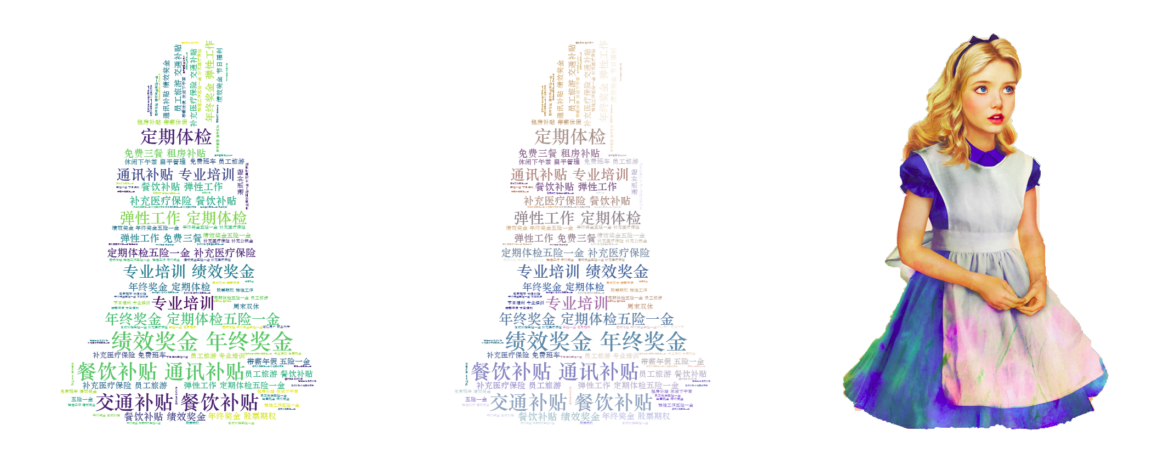

In [95]:
#画出工作福利待遇的词云图

alice_coloring = np.array(Image.open(r'E:\python4\ciyun\word_cloud-master\examples\alice_color.png'))
stopwords = set(STOPWORDS)
stopwords.add("said")
wc = WordCloud(background_color="white", max_words=2000, mask=alice_coloring,
               stopwords=stopwords, max_font_size=40, random_state=42,font_path='C:\windows\Fonts\STZHONGS.TTF')
wc.generate(text1)
image_colors = ImageColorGenerator(alice_coloring)

fig, axes = plt.subplots(1, 3,figsize = (20,20))
# plt.figure(figsize = (20,20))
axes[0].imshow(wc, interpolation="bilinear")
axes[1].imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
axes[2].imshow(alice_coloring, cmap=plt.cm.gray, interpolation="bilinear")
for ax in axes:
    ax.set_axis_off()
plt.show()
# help(axes[0])

In [96]:
df.head(5)

,job_name,company_name,salary,create_time,area,work_experience,education,people_num,job_information,company_area,company_info,work_fare,company_type,company_size,work_area,job_url,work_year
0,Python开发工程师,融信在线（北京）教育科技有限公司,0.8-2万/月,12-06,北京-丰台区,2年经验,本科,招3人,岗位职责：1. 熟悉C语言2. 至少2年以上Python编程经验3. 熟练运用Python语...,上班地址：丰台区万年花城附近\t\t\t\t\t\t\t\r\n地图,融信在线（北京）教育科技公司，致力于IT人才的培养、推荐、职业规划。中国国内真正专业培养数据...,五险一金\r\n年终奖金\r\n绩效奖金\r\n股票期权,民营公司,少于50人,"计算机服务(系统、数据服务、维修),教育/培训/院校",https://jobs.51job.com/beijing-ftq/75101700.ht...,2.0
1,Python开发工程师,北京斯普信信息技术有限公司,1-1.5万/月,12-06,北京,2年经验,大专,招1人,1、完成网络拓扑架构研发2、完成页面布局、浏览器适配、分辨率适配等功能3、完成相应模块的前端...,上班地址：海淀区羊坊店路9号 京门大厦\t\t\t\t\t\t\t\r\n地图,北京斯普信信息技术有限公司是一家专业性IT咨询服务公司，核心业务是数据库、小型机支持服务和人...,NaN,民营公司,150-500人,"计算机软件,互联网/电子商务",https://jobs.51job.com/beijing/97824451.html?s...,2.0
2,Python工程师,北京联龙博通电子商务技术有限公司,1-1.5万/月,12-06,北京-丰台区,3-4年经验,本科,招1人,岗位职责：1、负责后台微服务模块设计和开发，并具有后台独立开发能力和前后端联调经验；2、制定...,上班地址：马家堡\t\t\t\t\t\t\t\r\n地图,"北京联龙博通电子商务技术有限公司 （China M-world Co.,Ltd.，以下简称联...",五险一金\r\n绩效奖金\r\n年终奖金\r\n餐饮补贴\r\n通讯补贴,民营公司,1000-5000人,"互联网/电子商务,银行",https://jobs.51job.com/beijing-ftq/102501293.h...,3.5
3,Python开发工程师,纬创软件（北京）有限公司,1.2-2万/月,11-16,北京-朝阳区,3-4年经验,本科,招2人,主要工作职责： --参与运维支撑平台的建设、自动化运维平台以及运维工具的开发工作； ...,上班地址：来广营 诚盈中心 1号楼\t\t\t\t\t\t\t\r\n地图,公司概述纬创软件是亚洲地区专业的软件外包服务及信息整合服务的的领导厂商。我们专注于技术顾问服...,五险一金\r\n员工旅游\r\n弹性工作\r\n年终奖金,外资（非欧美）,1000-5000人,"计算机软件,计算机服务(系统、数据服务、维修)",https://jobs.51job.com/beijing-cyq/107746321.h...,3.5
4,Python/Golang/Linux C/中高级研发工程师,北京傲盾软件有限责任公司,0.6-1.2万/月,11-16,北京-海淀区,无工作经验,本科,招3人,岗位职责：1. 安全云平台研发。2. 互联网安全产品研发。3. 经过公司岗位培训后，能快速学...,上班地址：上地四街1号院3号楼5层\t\t\t\t\t\t\t\r\n地图,"傲盾防火墙开发团队成立于1998年。其成员既有海外留学生,也有根植于中国本土、熟悉国内技术发...",五险一金\r\n餐饮补贴\r\n专业培训\r\n绩效奖金\r\n年终奖金\r\n股票期权\r...,民营公司,50-150人,计算机软件,https://jobs.51job.com/beijing-hdq/96393288.ht...,0.0


In [97]:
#处理工资这一列数据
#首先删除空值的数据
sss = df['salary'].isnull()
df3 = df.drop(sss[sss.values == True].index)
len(df3)
# 然后去除以 元/天 和以 万/年 的数据
def ff(value_list):
    for i in value_list:
        x = df3['salary'].str.contains(i)
        df3.drop(x[x.values == True].index,inplace = True)
    return df3
# s4 = df3['salary'].str.contains('元/天')
# df3.drop(s4[s4.values == True].index,inplace = True)
df3 = ff(value_list = ['元/天','万/年','以下','小时'])

In [98]:
len(df3)

4770

In [99]:
#继续处理工资一列数据，全部处理为单位是 千/月 ，求区间的前25%，
import re
pattern = '\d+'
# df3['工资'] = df['salary'].str.findall(pattern)
avg_salary = []
num = 0
for i in df3['salary']:
#     print(re.findall(pattern,i))
    if i.find('万/月') != -1:
        i_list = i.replace('万/月','').split('-')
#         print(i_list)
#         v = float(i_list[0]) + (float(i_list[1]) - float(i_list[0])) / 4
        v = (float(i_list[0])+float(i_list[1]))/2
        num+=1
        if v>10:
            v = v/10
        avg_salary.append(v*10)
    else:
        i_list = i.replace('千/月','').split('-')
#         print(i_list)
#         v = float(i_list[0]) + (float(i_list[1]) - float(i_list[0])) / 4
        v = (float(i_list[0])+float(i_list[1]))/2
        num+=1
        if v>10:
            v = v/10
        avg_salary.append(v)
df3['salary'] = avg_salary


In [100]:
f = np.array(avg_salary)
np.where(f>80)

(array([1588, 4590], dtype=int64),)

In [101]:
df3['salary'].head()

0    14.0
1    12.5
2    12.5
3    16.0
4     9.0
Name: salary, dtype: float64

In [102]:
df3.head(5)

,job_name,company_name,salary,create_time,area,work_experience,education,people_num,job_information,company_area,company_info,work_fare,company_type,company_size,work_area,job_url,work_year
0,Python开发工程师,融信在线（北京）教育科技有限公司,14.0,12-06,北京-丰台区,2年经验,本科,招3人,岗位职责：1. 熟悉C语言2. 至少2年以上Python编程经验3. 熟练运用Python语...,上班地址：丰台区万年花城附近\t\t\t\t\t\t\t\r\n地图,融信在线（北京）教育科技公司，致力于IT人才的培养、推荐、职业规划。中国国内真正专业培养数据...,五险一金\r\n年终奖金\r\n绩效奖金\r\n股票期权,民营公司,少于50人,"计算机服务(系统、数据服务、维修),教育/培训/院校",https://jobs.51job.com/beijing-ftq/75101700.ht...,2.0
1,Python开发工程师,北京斯普信信息技术有限公司,12.5,12-06,北京,2年经验,大专,招1人,1、完成网络拓扑架构研发2、完成页面布局、浏览器适配、分辨率适配等功能3、完成相应模块的前端...,上班地址：海淀区羊坊店路9号 京门大厦\t\t\t\t\t\t\t\r\n地图,北京斯普信信息技术有限公司是一家专业性IT咨询服务公司，核心业务是数据库、小型机支持服务和人...,NaN,民营公司,150-500人,"计算机软件,互联网/电子商务",https://jobs.51job.com/beijing/97824451.html?s...,2.0
2,Python工程师,北京联龙博通电子商务技术有限公司,12.5,12-06,北京-丰台区,3-4年经验,本科,招1人,岗位职责：1、负责后台微服务模块设计和开发，并具有后台独立开发能力和前后端联调经验；2、制定...,上班地址：马家堡\t\t\t\t\t\t\t\r\n地图,"北京联龙博通电子商务技术有限公司 （China M-world Co.,Ltd.，以下简称联...",五险一金\r\n绩效奖金\r\n年终奖金\r\n餐饮补贴\r\n通讯补贴,民营公司,1000-5000人,"互联网/电子商务,银行",https://jobs.51job.com/beijing-ftq/102501293.h...,3.5
3,Python开发工程师,纬创软件（北京）有限公司,16.0,11-16,北京-朝阳区,3-4年经验,本科,招2人,主要工作职责： --参与运维支撑平台的建设、自动化运维平台以及运维工具的开发工作； ...,上班地址：来广营 诚盈中心 1号楼\t\t\t\t\t\t\t\r\n地图,公司概述纬创软件是亚洲地区专业的软件外包服务及信息整合服务的的领导厂商。我们专注于技术顾问服...,五险一金\r\n员工旅游\r\n弹性工作\r\n年终奖金,外资（非欧美）,1000-5000人,"计算机软件,计算机服务(系统、数据服务、维修)",https://jobs.51job.com/beijing-cyq/107746321.h...,3.5
4,Python/Golang/Linux C/中高级研发工程师,北京傲盾软件有限责任公司,9.0,11-16,北京-海淀区,无工作经验,本科,招3人,岗位职责：1. 安全云平台研发。2. 互联网安全产品研发。3. 经过公司岗位培训后，能快速学...,上班地址：上地四街1号院3号楼5层\t\t\t\t\t\t\t\r\n地图,"傲盾防火墙开发团队成立于1998年。其成员既有海外留学生,也有根植于中国本土、熟悉国内技术发...",五险一金\r\n餐饮补贴\r\n专业培训\r\n绩效奖金\r\n年终奖金\r\n股票期权\r...,民营公司,50-150人,计算机软件,https://jobs.51job.com/beijing-hdq/96393288.ht...,0.0


# 平均薪资水平

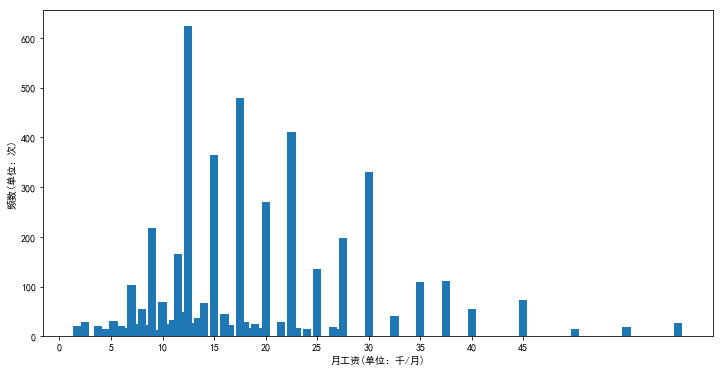

In [103]:
#平均工资水平
average_salary = df3['salary'].value_counts().head(50)
plt.figure(figsize=(12,6))
plt.rcParams['font.sans-serif'] = 'SimHei'
# # plt.subplot(1,1)
plt.bar(average_salary.index,average_salary.values)
plt.xticks([0,5,10,15,20,25,30,35,40,45])
plt.xlabel('月工资(单位：千/月)')
plt.ylabel('频数(单位：次)')
plt.show()

In [104]:
df.head()

,job_name,company_name,salary,create_time,area,work_experience,education,people_num,job_information,company_area,company_info,work_fare,company_type,company_size,work_area,job_url,work_year
0,Python开发工程师,融信在线（北京）教育科技有限公司,0.8-2万/月,12-06,北京-丰台区,2年经验,本科,招3人,岗位职责：1. 熟悉C语言2. 至少2年以上Python编程经验3. 熟练运用Python语...,上班地址：丰台区万年花城附近\t\t\t\t\t\t\t\r\n地图,融信在线（北京）教育科技公司，致力于IT人才的培养、推荐、职业规划。中国国内真正专业培养数据...,五险一金\r\n年终奖金\r\n绩效奖金\r\n股票期权,民营公司,少于50人,"计算机服务(系统、数据服务、维修),教育/培训/院校",https://jobs.51job.com/beijing-ftq/75101700.ht...,2.0
1,Python开发工程师,北京斯普信信息技术有限公司,1-1.5万/月,12-06,北京,2年经验,大专,招1人,1、完成网络拓扑架构研发2、完成页面布局、浏览器适配、分辨率适配等功能3、完成相应模块的前端...,上班地址：海淀区羊坊店路9号 京门大厦\t\t\t\t\t\t\t\r\n地图,北京斯普信信息技术有限公司是一家专业性IT咨询服务公司，核心业务是数据库、小型机支持服务和人...,NaN,民营公司,150-500人,"计算机软件,互联网/电子商务",https://jobs.51job.com/beijing/97824451.html?s...,2.0
2,Python工程师,北京联龙博通电子商务技术有限公司,1-1.5万/月,12-06,北京-丰台区,3-4年经验,本科,招1人,岗位职责：1、负责后台微服务模块设计和开发，并具有后台独立开发能力和前后端联调经验；2、制定...,上班地址：马家堡\t\t\t\t\t\t\t\r\n地图,"北京联龙博通电子商务技术有限公司 （China M-world Co.,Ltd.，以下简称联...",五险一金\r\n绩效奖金\r\n年终奖金\r\n餐饮补贴\r\n通讯补贴,民营公司,1000-5000人,"互联网/电子商务,银行",https://jobs.51job.com/beijing-ftq/102501293.h...,3.5
3,Python开发工程师,纬创软件（北京）有限公司,1.2-2万/月,11-16,北京-朝阳区,3-4年经验,本科,招2人,主要工作职责： --参与运维支撑平台的建设、自动化运维平台以及运维工具的开发工作； ...,上班地址：来广营 诚盈中心 1号楼\t\t\t\t\t\t\t\r\n地图,公司概述纬创软件是亚洲地区专业的软件外包服务及信息整合服务的的领导厂商。我们专注于技术顾问服...,五险一金\r\n员工旅游\r\n弹性工作\r\n年终奖金,外资（非欧美）,1000-5000人,"计算机软件,计算机服务(系统、数据服务、维修)",https://jobs.51job.com/beijing-cyq/107746321.h...,3.5
4,Python/Golang/Linux C/中高级研发工程师,北京傲盾软件有限责任公司,0.6-1.2万/月,11-16,北京-海淀区,无工作经验,本科,招3人,岗位职责：1. 安全云平台研发。2. 互联网安全产品研发。3. 经过公司岗位培训后，能快速学...,上班地址：上地四街1号院3号楼5层\t\t\t\t\t\t\t\r\n地图,"傲盾防火墙开发团队成立于1998年。其成员既有海外留学生,也有根植于中国本土、熟悉国内技术发...",五险一金\r\n餐饮补贴\r\n专业培训\r\n绩效奖金\r\n年终奖金\r\n股票期权\r...,民营公司,50-150人,计算机软件,https://jobs.51job.com/beijing-hdq/96393288.ht...,0.0


In [105]:
len(df)

5534

# 学历要求

In [106]:
#对于学历的要求
#首先判断是否有空数据
# e2 = df['education'].notnull()
# e2[e2.values == False].index
#再次判断是否有 不限 的数据
e4 = df['education'].str.contains('不限')
e4[e4.values == True]
#将数据中包含 招 字的信息更改为 大专
e3 = df['education'].str.contains('招')
df['education'][e3[e3.values == True].index] = '大专'


D:\anacondainstall\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


Text(0,0.5,'频数')

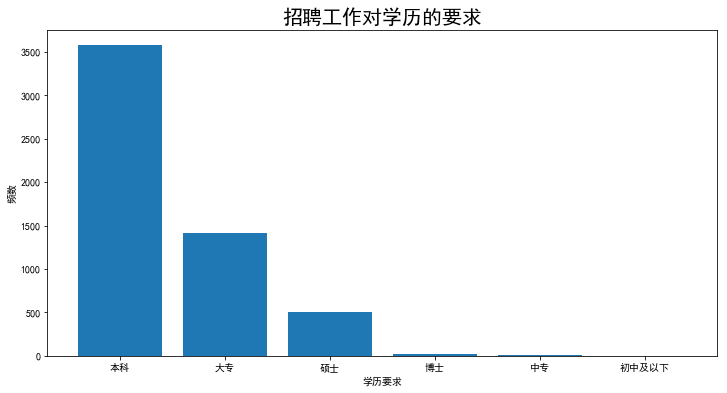

In [107]:
# df.head(12)
e4 = df['education'].value_counts()
plt.figure(figsize = (12,6))
plt.bar(e4.index,e4.values)
plt.title('招聘工作对学历的要求',fontsize = 20)
plt.xlabel('学历要求')
plt.ylabel('频数')

#可以看出，学历要求 本科 最多，其次是大专，然后是硕士

In [108]:
len(df3)

4770

D:\anacondainstall\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


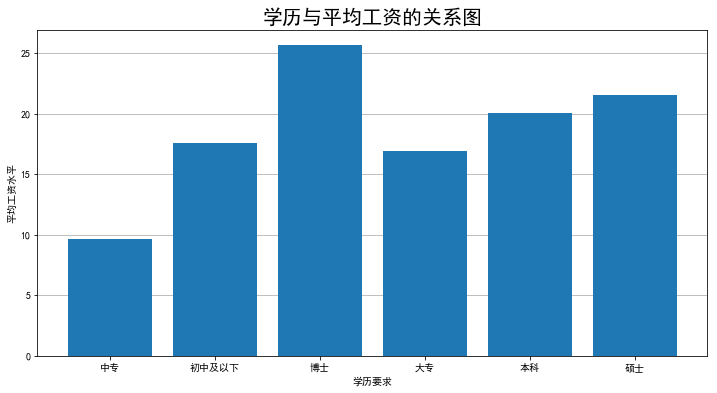

In [109]:
e6 = df3['education'].str.contains('不限')
e6[e6.values == True]
#将数据中包含 招 字的信息更改为 大专
e8 = df3['education'].str.contains('招')
df3['education'][e8[e8.values == True].index] = '大专'

edu_info = df3.groupby('education')['salary'].mean()

plt.figure(figsize = (12,6))
plt.bar(edu_info.index,edu_info.values)
plt.grid(axis = 'y')
ax = plt.gca()
ax.set_axisbelow(True)
plt.title('学历与平均工资的关系图',fontsize = 20)
plt.xlabel('学历要求')
plt.ylabel('平均工资水平')
plt.show()

# 公司地区分布

In [110]:
#对公司所在地区进行数据处理
# df['area'].value_counts()
#首先除去不是北京的城市

a1 = df3['area'].str.startswith('北京')
df3.drop(a1[a1.values == False].index,inplace = True)
print(len(df3))
#然后除去 area 是北京的 条目
# a2 = df['area'] == '北京'
# df_area = df3[df['area'] != '北京']
# df_area = df.loc[a2[a2.values == False].index]
# len(df_area)
df_area = df3

4604


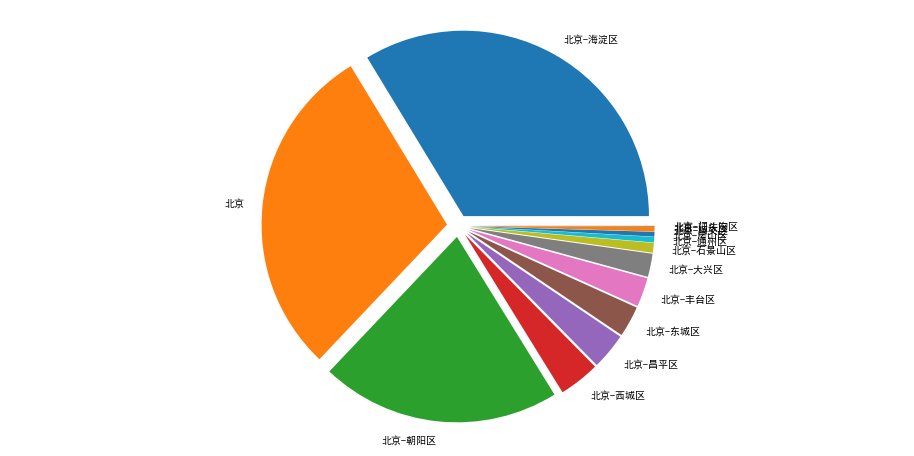

In [111]:
plt.figure(figsize = (16,8))
area_count = df_area['area'].value_counts()
# print(area_count)
# print(area_count.index)
plt.pie(area_count,labels = area_count.index,explode = [0.06]*len(area_count));
plt.axis('equal')    #使图形称为正圆
plt.show()
#可以看出，公司分布最多的是海淀区，其次是朝阳区

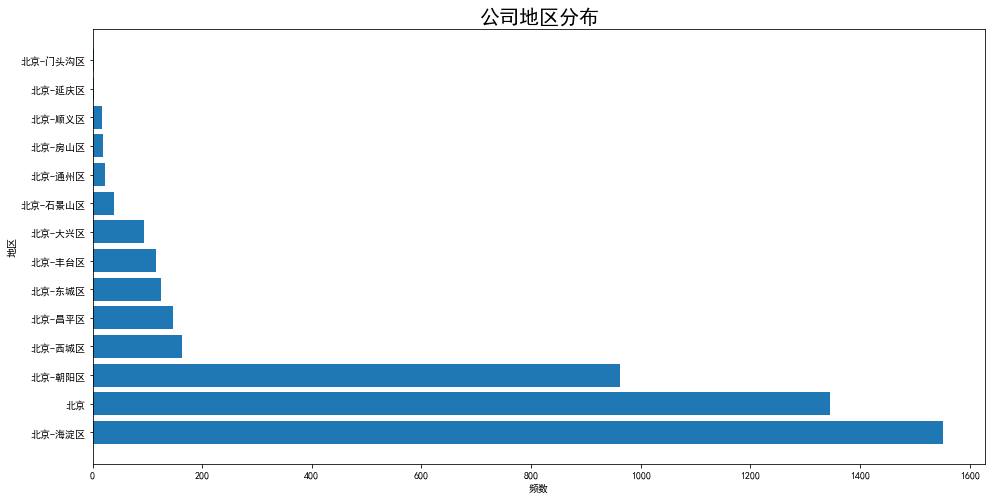

In [112]:
plt.figure(figsize = (16,8))
plt.barh(area_count.index,area_count.values)
plt.xlabel('频数')
plt.ylabel('地区')
plt.title('公司地区分布',fontsize = 20)
plt.show()

In [113]:
df.head()

,job_name,company_name,salary,create_time,area,work_experience,education,people_num,job_information,company_area,company_info,work_fare,company_type,company_size,work_area,job_url,work_year
0,Python开发工程师,融信在线（北京）教育科技有限公司,0.8-2万/月,12-06,北京-丰台区,2年经验,本科,招3人,岗位职责：1. 熟悉C语言2. 至少2年以上Python编程经验3. 熟练运用Python语...,上班地址：丰台区万年花城附近\t\t\t\t\t\t\t\r\n地图,融信在线（北京）教育科技公司，致力于IT人才的培养、推荐、职业规划。中国国内真正专业培养数据...,五险一金\r\n年终奖金\r\n绩效奖金\r\n股票期权,民营公司,少于50人,"计算机服务(系统、数据服务、维修),教育/培训/院校",https://jobs.51job.com/beijing-ftq/75101700.ht...,2.0
1,Python开发工程师,北京斯普信信息技术有限公司,1-1.5万/月,12-06,北京,2年经验,大专,招1人,1、完成网络拓扑架构研发2、完成页面布局、浏览器适配、分辨率适配等功能3、完成相应模块的前端...,上班地址：海淀区羊坊店路9号 京门大厦\t\t\t\t\t\t\t\r\n地图,北京斯普信信息技术有限公司是一家专业性IT咨询服务公司，核心业务是数据库、小型机支持服务和人...,NaN,民营公司,150-500人,"计算机软件,互联网/电子商务",https://jobs.51job.com/beijing/97824451.html?s...,2.0
2,Python工程师,北京联龙博通电子商务技术有限公司,1-1.5万/月,12-06,北京-丰台区,3-4年经验,本科,招1人,岗位职责：1、负责后台微服务模块设计和开发，并具有后台独立开发能力和前后端联调经验；2、制定...,上班地址：马家堡\t\t\t\t\t\t\t\r\n地图,"北京联龙博通电子商务技术有限公司 （China M-world Co.,Ltd.，以下简称联...",五险一金\r\n绩效奖金\r\n年终奖金\r\n餐饮补贴\r\n通讯补贴,民营公司,1000-5000人,"互联网/电子商务,银行",https://jobs.51job.com/beijing-ftq/102501293.h...,3.5
3,Python开发工程师,纬创软件（北京）有限公司,1.2-2万/月,11-16,北京-朝阳区,3-4年经验,本科,招2人,主要工作职责： --参与运维支撑平台的建设、自动化运维平台以及运维工具的开发工作； ...,上班地址：来广营 诚盈中心 1号楼\t\t\t\t\t\t\t\r\n地图,公司概述纬创软件是亚洲地区专业的软件外包服务及信息整合服务的的领导厂商。我们专注于技术顾问服...,五险一金\r\n员工旅游\r\n弹性工作\r\n年终奖金,外资（非欧美）,1000-5000人,"计算机软件,计算机服务(系统、数据服务、维修)",https://jobs.51job.com/beijing-cyq/107746321.h...,3.5
4,Python/Golang/Linux C/中高级研发工程师,北京傲盾软件有限责任公司,0.6-1.2万/月,11-16,北京-海淀区,无工作经验,本科,招3人,岗位职责：1. 安全云平台研发。2. 互联网安全产品研发。3. 经过公司岗位培训后，能快速学...,上班地址：上地四街1号院3号楼5层\t\t\t\t\t\t\t\r\n地图,"傲盾防火墙开发团队成立于1998年。其成员既有海外留学生,也有根植于中国本土、熟悉国内技术发...",五险一金\r\n餐饮补贴\r\n专业培训\r\n绩效奖金\r\n年终奖金\r\n股票期权\r...,民营公司,50-150人,计算机软件,https://jobs.51job.com/beijing-hdq/96393288.ht...,0.0


# 工作年限要求

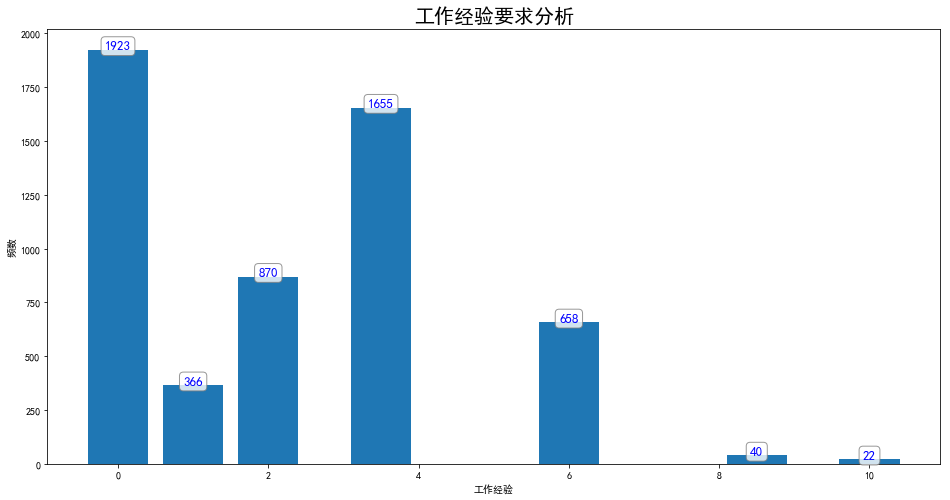

In [114]:
exp = df['work_year'].value_counts()
plt.figure(figsize = (16,8))
plt.bar(exp.index,exp.values)
plt.xlabel('工作经验')
plt.ylabel('频数')
plt.title('工作经验要求分析',fontsize = 20)
for x,y in zip(*[exp.index,exp.values]):
    ana_text = y
    plt.text(x,y+0.8,ana_text,fontsize = 13,color='blue',ha='center',
             bbox = dict(boxstyle="round", fc='w', ec="0.5", lw=1,alpha = 0.8))
plt.show()

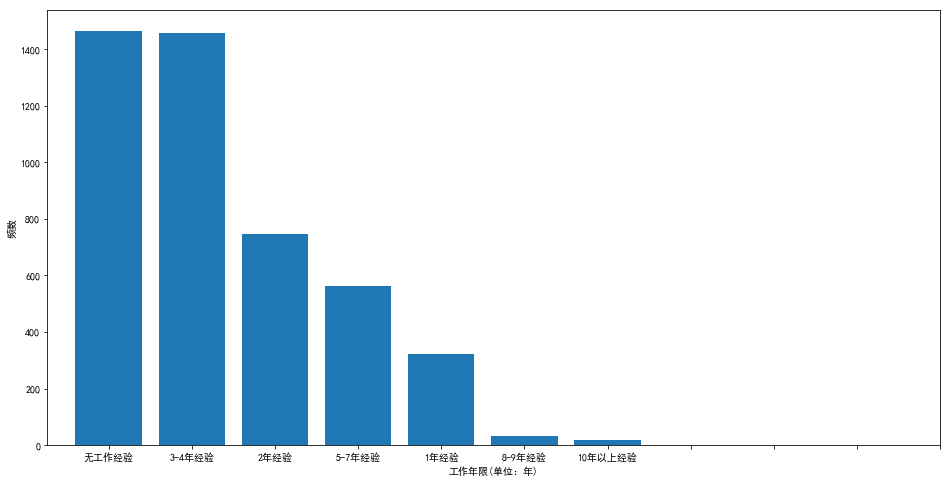

In [115]:
s_exp = df3['work_experience'].value_counts()
plt.figure(figsize=(16,8))
plt.bar(s_exp.index,s_exp.values)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10])
plt.xlabel('工作年限(单位：年)')
plt.ylabel('频数')
plt.show()

In [116]:
#DataFrame的整体数据摘要(返回有数据的列的一些统计信息)
df3.describe()

,salary,work_year
count,4604.000000,4604.000000
mean,19.209242,2.335795
std,9.967485,2.111201
min,1.500000,0.000000
25%,12.500000,0.000000
50%,17.500000,2.000000
75%,25.000000,3.500000
max,95.000000,10.000000


# 需要的技能

In [117]:
import io
import os
import string
from os import path
from wordcloud import WordCloud, STOPWORDS

j1 = df3['job_information'].isnull()
df4 = df.drop(j1[j1.values == True].index)
text3 = ''
# plt.figure(figsize = (16,8))
for i in df4['job_information']:
    v = i.strip().replace('岗位职责','').replace('职能类别','').replace(',','').replace('职责描述','').replace('岗位描述','')\
    .replace('关键字','').replace('微信分享','').replace('岗位要求','').replace('skill','').replace('工作内容','').replace('其他','')\
    .replace('任职要求','').replace('任职资格','').replace('、','').replace('，','').replace('职位要求','').replace('工作职责','')\
    .replace('职位描述','').replace('数据库工程师','').replace('软件工程师','')
    text3+=v

# alice_mask = np.array(Image.open(r'E:\python4\ciyun\word_cloud-master\examples\alice_mask.png'))
# stopwords = set(STOPWORDS)
# stopwords.add("said")

# wc = WordCloud(background_color="white", max_words=2000, mask=alice_mask,font_path='C:\windows\Fonts\STZHONGS.TTF',
#                stopwords=stopwords, contour_width=3, contour_color='steelblue')

# wc.generate(text3)
# wc.to_file(r"E:\python4\ciyun\word_cloud-master\examples\alice.png")

# wordcloud = WordCloud(font_path='C:\windows\Fonts\STZHONGS.TTF').generate(text3)

# plt.imshow(wc, interpolation='bilinear')
# plt.axis("off")
# plt.figure()
# plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
# plt.axis("off")
# plt.show()

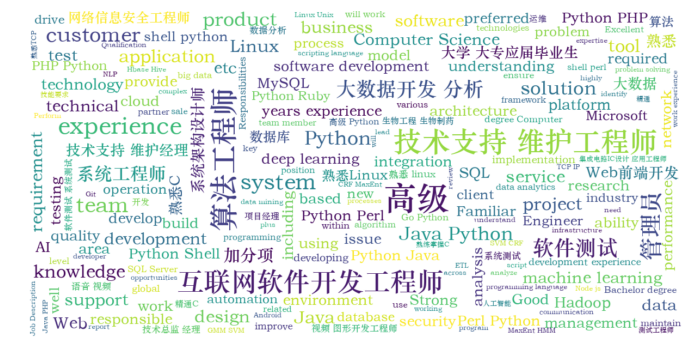

In [118]:
wordcloud = WordCloud(background_color="white",max_font_size=60,font_path='C:\windows\Fonts\STZHONGS.TTF',width = 1200,height = 600)
wordcloud.generate(text3)
plt.figure(figsize = (12,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [119]:
pd.Series(['a','b'])

0    a
1    b
dtype: object

In [120]:
import jieba
from pyecharts import WordCloud
text5 = ''
list5 = []
for x in df4['job_information']:
    t = i.strip().replace('岗位职责','').replace('职能类别','').replace(',','').replace('职责描述','').replace('岗位描述','')\
    .replace('关键字','').replace('微信分享','').replace('岗位要求','').replace('skill','').replace('工作内容','')\
    .replace('任职要求','').replace('任职资格','').replace('、','').replace('，','').replace('职位要求','').replace('工作年限','')
#     text5+=t
#     text5 = jieba.lcut(t)
    list5.extend(text5)
# print(list5)
s5 = pd.Series(list5)
s5.sort_values(ascending = False,inplace = True)
ss = s5.value_counts().head(50)
# print(ss)
# cut_text = ''.join(jieba.cut(text5))
# wordcloud = WordCloud(background_color="white",max_font_size=80,font_path='C:\windows\Fonts\STZHONGS.TTF',width = 1200,height = 600)
# wordcloud.generate(ss.index)
# plt.figure(figsize = (16,8))
wordcloud = WordCloud(width=1300, height=620)
wordcloud.add("", ss.index, ss.values, word_size_range=[20, 100])
wordcloud.render('e:\python4\jieba.html')
# plt.imshow(wordcloud, interpolation="bilinear")
# plt.axis("off")
# plt.show()

In [121]:
print(jieba.lcut('我在北京学习计算机'))

['我', '在', '北京', '学习', '计算机']


# 薪资分布

In [122]:
sa_series = df_area.groupby('area')['salary'].mean()
me_series = df_area.groupby('area')['salary'].apply(lambda x:x.sort_values())

me_series.drop_duplicates(inplace = True)
# print(me_series.index)
list8 = []
for i in me_series.index:
    list8.append(i[0])
max_series = df_area.groupby('area')['salary'].apply(lambda x:x.max())
min_series = df_area.groupby('area')['salary'].apply(lambda x:x.min())
min_series

area
北京          1.75
北京-东城区      1.50
北京-丰台区      2.50
北京-大兴区      5.00
北京-延庆区     14.00
北京-房山区      6.50
北京-昌平区      1.75
北京-朝阳区      1.75
北京-海淀区      1.75
北京-石景山区     5.25
北京-西城区      1.75
北京-通州区      1.75
北京-门头沟区     9.50
北京-顺义区      9.00
Name: salary, dtype: float64

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]


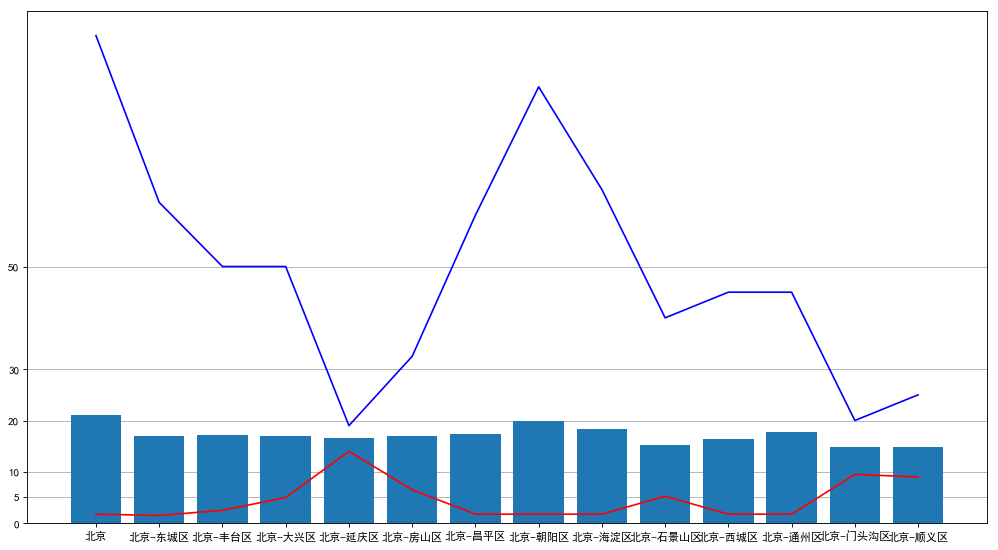

In [123]:

fig = plt.figure(num=6, figsize=(15, 8),dpi=80)
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
# ax2 = fig.add_axes([0.1,0.8,0.8,0.8])


ax1.bar(sa_series.index,sa_series.values)
print(list(range(1,len(sa_series)+1)))
ax1.set_yticks([0,5,10,20,30,50,100,150])
ax1.grid(axis='y')
ax1.set_axisbelow(True)
ax1.plot(max_series.index,max_series.values,color ='b')
ax1.plot(min_series.index,min_series.values,color = 'r')
# print(list8)
# print(me_series.values*1000)
#显示绘图结果
plt.show()

In [124]:
dfff.head()

NameError: name 'dfff' is not defined

In [ ]:
dfff = df_area.sort_values(by = 'area')

a2 = dfff['area'] == '北京'
dfff.drop(a2[a2.values == True].index,inplace = True)

# print(dfff)
# dff2 = dfff.loc[dfff['salary'].drop_duplicates().index]
dfff['jishu'] = list(range(1,len(dfff)+1))
plt.figure(figsize = (16,8))

ss = dfff.groupby('area').count()['job_name']

area_name = list(dfff['area'].value_counts().index)
# print(area_name)
dfff.index = dfff['area']
plt.scatter(dfff.index,dfff['salary'])
# print(dfff.index)

# print(dfff['area'].values)
area_info = []
for i in area_name:
    i_info = dfff.loc[i]['salary']
#     print(i_info.values)
#     print('*'*100)
    area_info.append(i_info.values)
        
# dfff.head()
# print(area_info)
# plt.xticks([range(ss.values[0]),range(ss.values[1]),range(ss.value[2])])
# ss.index   #Index(['北京-东城区', '北京-丰台区', '北京-大兴区', '北京-昌平区', '北京-朝阳区', '北京-海淀区', '北京-门头沟区','北京-顺义区'],
# ss.values    #array([36, 17, 12, 14, 24, 23,  1,  1], dtype=int64)


In [ ]:
from pyecharts import EffectScatter

v1 = dfff.index
# print(v1)
v2 = dfff['salary']
es = EffectScatter('散点图')
es.add('薪资地区散点图',v1,v2)
es.render('e:\python4\ciyun\sandian.html')

In [ ]:
# from pyecharts import Line

# line = Line("折线图示例")
# # for i in area_name:
    
# v = list(dfff.loc[i]['salary'].drop_duplicates())
# #     print(v)
# attr = list(range(1,len(v)+1))
    
# #     print(attr)
# line.add(i, attr, v, mark_point=["average"])
# # line.add("商家B", attr, v2, is_smooth=True, mark_line=["max", "average"])
# line.render()



In [ ]:
df_area.groupby(['area'])
# area_salary

In [ ]:
# df_area.pivot_table(index = 'area',columns = 'job_name',values = 'salary')
# df_area.groupby(['area','salary']).apply(lambda x:x.sort_values(by='salary',ascending = True))

In [ ]:
from pyecharts import Map

m = Map('北京市地图',width = 600,height = 400)

value_list = []
for i in area_info:
    value_list.append(np.mean(sum(i)))

area_list = []
for i in area_name:
    area_list.append(i.split('-')[1])

attr = ['西城区','东城区']
m.add('',area_list,area_info,maptype = '北京', visual_range=[0, 100], is_visualmap=True, visual_text_color='#000')

# m.show_config()

m.render()


# 薪资和工作年限的关系

In [ ]:
df3.head()

In [ ]:
ss = df3.groupby('work_experience')['salary'].mean()
plt.figure(figsize = (16,8))
plt.bar(ss.index,ss.values)
plt.xlabel('工作经验')
plt.ylabel('平均工资')
plt.title('工作经验与工资的关系')
plt.show()

# 公司类型信息

In [ ]:
cm_info = df['company_type'].value_counts()
plt.figure(figsize = (12,6))
plt.bar(cm_info.index,cm_info.values)
plt.xlabel('公司类型')
plt.ylabel('频数')
plt.title('公司类型分析',fontsize = 20)
plt.show()

# 公司规模分析

In [ ]:
cm_size = df['company_size'].value_counts()
plt.figure(figsize = (12,6))
plt.bar(cm_size.index,cm_size.values)
plt.xlabel('公司规模')
plt.ylabel('频数')
plt.title('公司规模分析图',fontsize = 20)
plt.show()

In [ ]:
df.describe(include = ['O'])

# 工作领域分布分析

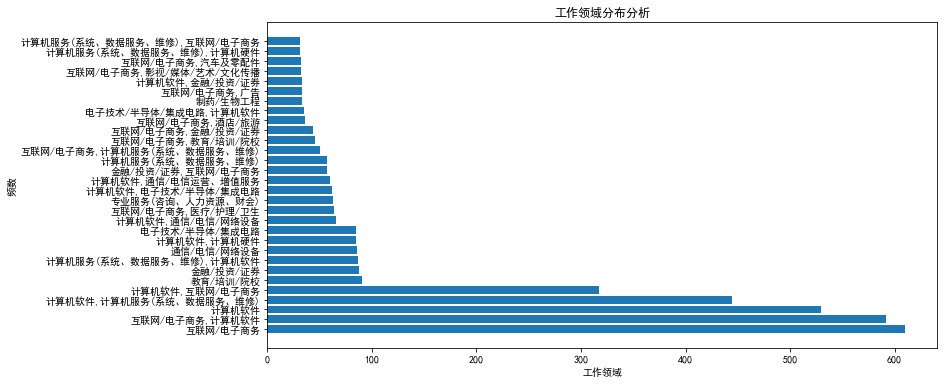

In [125]:
wa_info = df['work_area'].value_counts().head(30)
plt.figure(figsize = (12,6))
plt.barh(wa_info.index,wa_info.values)
plt.xlabel('工作领域')

plt.ylabel('频数')
plt.title('工作领域分布分析')
plt.show()

In [126]:
df.head()

,job_name,company_name,salary,create_time,area,work_experience,education,people_num,job_information,company_area,company_info,work_fare,company_type,company_size,work_area,job_url,work_year
0,Python开发工程师,融信在线（北京）教育科技有限公司,0.8-2万/月,12-06,北京-丰台区,2年经验,本科,招3人,岗位职责：1. 熟悉C语言2. 至少2年以上Python编程经验3. 熟练运用Python语...,上班地址：丰台区万年花城附近\t\t\t\t\t\t\t\r\n地图,融信在线（北京）教育科技公司，致力于IT人才的培养、推荐、职业规划。中国国内真正专业培养数据...,五险一金\r\n年终奖金\r\n绩效奖金\r\n股票期权,民营公司,少于50人,"计算机服务(系统、数据服务、维修),教育/培训/院校",https://jobs.51job.com/beijing-ftq/75101700.ht...,2.0
1,Python开发工程师,北京斯普信信息技术有限公司,1-1.5万/月,12-06,北京,2年经验,大专,招1人,1、完成网络拓扑架构研发2、完成页面布局、浏览器适配、分辨率适配等功能3、完成相应模块的前端...,上班地址：海淀区羊坊店路9号 京门大厦\t\t\t\t\t\t\t\r\n地图,北京斯普信信息技术有限公司是一家专业性IT咨询服务公司，核心业务是数据库、小型机支持服务和人...,NaN,民营公司,150-500人,"计算机软件,互联网/电子商务",https://jobs.51job.com/beijing/97824451.html?s...,2.0
2,Python工程师,北京联龙博通电子商务技术有限公司,1-1.5万/月,12-06,北京-丰台区,3-4年经验,本科,招1人,岗位职责：1、负责后台微服务模块设计和开发，并具有后台独立开发能力和前后端联调经验；2、制定...,上班地址：马家堡\t\t\t\t\t\t\t\r\n地图,"北京联龙博通电子商务技术有限公司 （China M-world Co.,Ltd.，以下简称联...",五险一金\r\n绩效奖金\r\n年终奖金\r\n餐饮补贴\r\n通讯补贴,民营公司,1000-5000人,"互联网/电子商务,银行",https://jobs.51job.com/beijing-ftq/102501293.h...,3.5
3,Python开发工程师,纬创软件（北京）有限公司,1.2-2万/月,11-16,北京-朝阳区,3-4年经验,本科,招2人,主要工作职责： --参与运维支撑平台的建设、自动化运维平台以及运维工具的开发工作； ...,上班地址：来广营 诚盈中心 1号楼\t\t\t\t\t\t\t\r\n地图,公司概述纬创软件是亚洲地区专业的软件外包服务及信息整合服务的的领导厂商。我们专注于技术顾问服...,五险一金\r\n员工旅游\r\n弹性工作\r\n年终奖金,外资（非欧美）,1000-5000人,"计算机软件,计算机服务(系统、数据服务、维修)",https://jobs.51job.com/beijing-cyq/107746321.h...,3.5
4,Python/Golang/Linux C/中高级研发工程师,北京傲盾软件有限责任公司,0.6-1.2万/月,11-16,北京-海淀区,无工作经验,本科,招3人,岗位职责：1. 安全云平台研发。2. 互联网安全产品研发。3. 经过公司岗位培训后，能快速学...,上班地址：上地四街1号院3号楼5层\t\t\t\t\t\t\t\r\n地图,"傲盾防火墙开发团队成立于1998年。其成员既有海外留学生,也有根植于中国本土、熟悉国内技术发...",五险一金\r\n餐饮补贴\r\n专业培训\r\n绩效奖金\r\n年终奖金\r\n股票期权\r...,民营公司,50-150人,计算机软件,https://jobs.51job.com/beijing-hdq/96393288.ht...,0.0


AttributeError: 'NoneType' object has no attribute 'update'

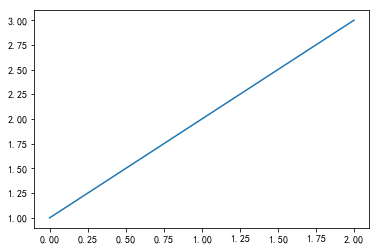

In [152]:
s = pd.Series({'a':1,'b':2,'c':3})
s.plot(xticks = list(s.index))
print(list(s.index))